In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
index_csv_1 = 'data_2_9'
index_csv_2 = 'data_9_9'

In [38]:
def read_csv_data(index_csv,location):
    csv_read = pd.read_csv(index_csv+'/'+location+'.csv').dropna()
    df_new = csv_read.drop(csv_read[~((csv_read['SSID'] == 'eduroam') | (csv_read['SSID'] == 'Unifi') | (csv_read['SSID'] == 'UnifiGuest'))].index)
    df_new = csv_read
    print('Dropped '+ str(len(csv_read)-len(df_new))+' connections')
    df_new = df_new.sort_values('RSSI',ascending=False)
    return df_new

In [31]:
def plot_df_line(dataframe):
    data = {'Index':[x for x in range(0,len(dataframe))],
            'RSSI': dataframe['RSSI']}
    df_new = pd.DataFrame(data,columns=['Index','RSSI'])
    fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,7))   
    df_new.plot(ax=axes,x='Index',y='RSSI',kind='line')
    plt.show()
    print('Mean RSSI: '+str(df_new['RSSI'].mean())+'\n')

Dropped 29 connections


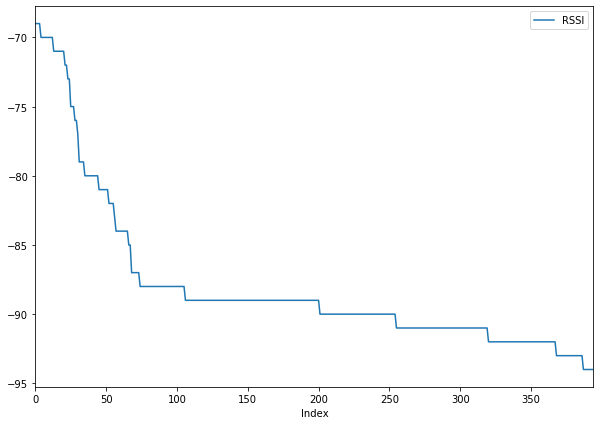

Mean RSSI: -87.95189873417722

Dropped 27 connections


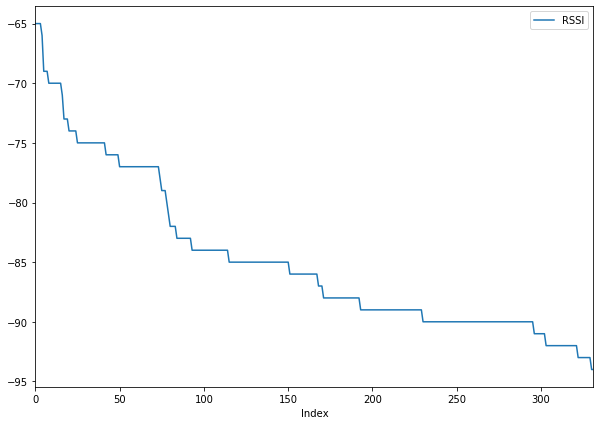

Mean RSSI: -84.79518072289157



In [32]:
df_1 = read_csv_data(index_csv_1,'1')
plot_df_line(df_1)
df_2 = read_csv_data(index_csv_2,'1')
plot_df_line(df_2)


LOCATION 1
Dropped 0 connections


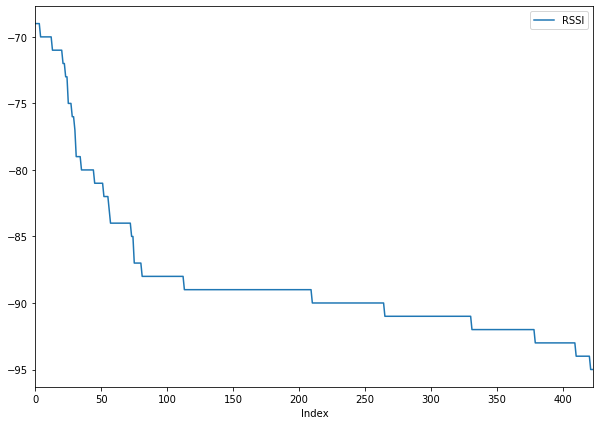

Mean RSSI: -88.13915094339623

LOCATION 2
Dropped 0 connections


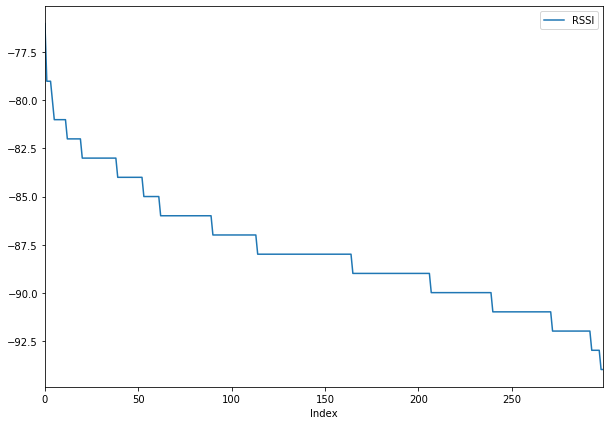

Mean RSSI: -87.74333333333334

LOCATION 3
Dropped 0 connections


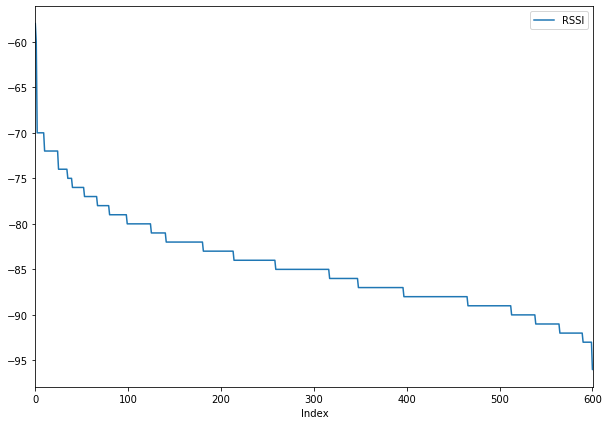

Mean RSSI: -84.50332225913621

LOCATION 4
Dropped 0 connections


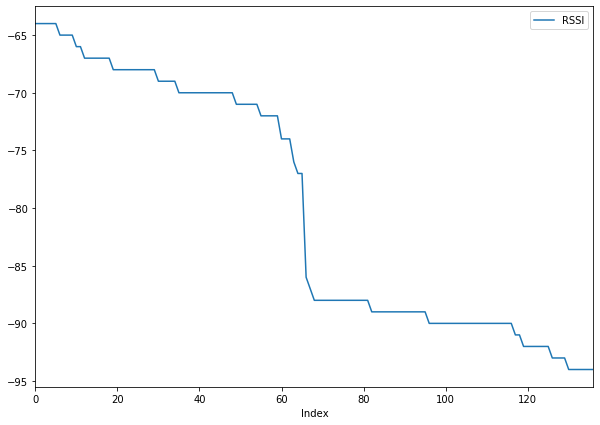

Mean RSSI: -79.94890510948905

LOCATION 5
Dropped 0 connections


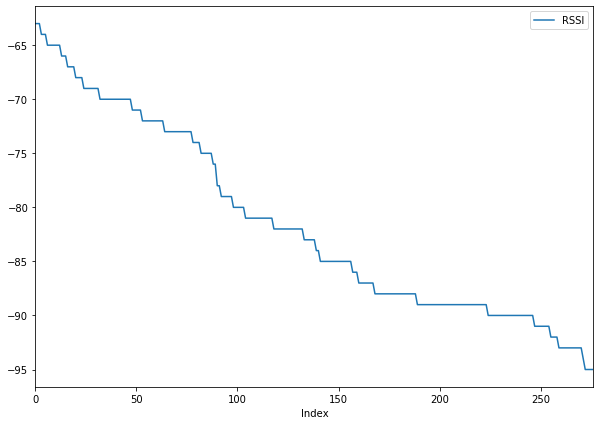

Mean RSSI: -81.51985559566786

LOCATION 6
Dropped 0 connections


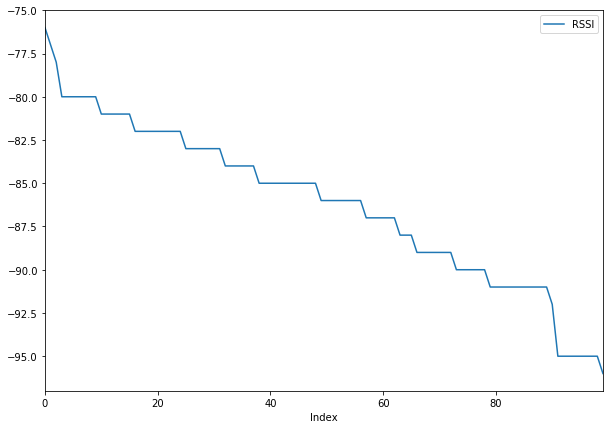

Mean RSSI: -86.21

LOCATION 7
Dropped 0 connections


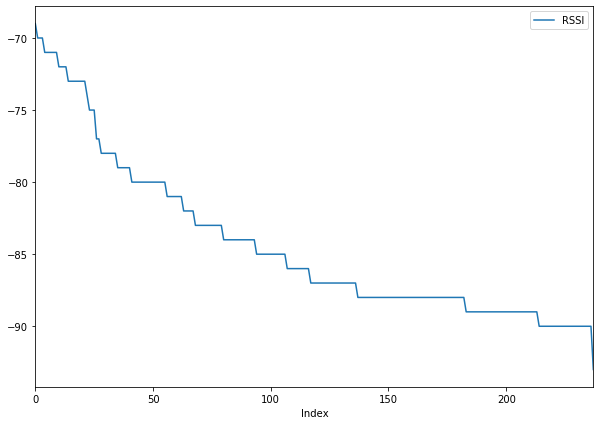

Mean RSSI: -84.34453781512605

LOCATION 8
Dropped 0 connections


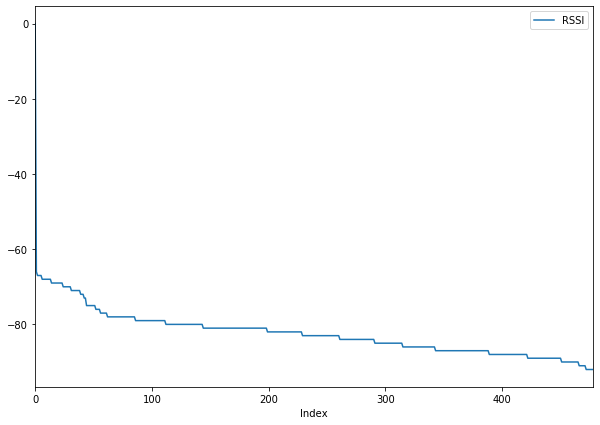

Mean RSSI: -82.26722338204593

LOCATION 9
Dropped 0 connections


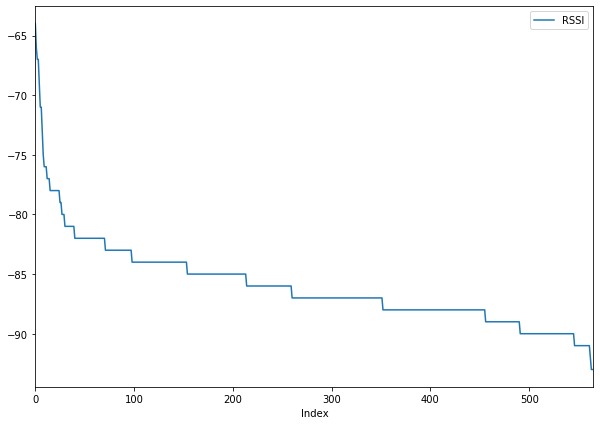

Mean RSSI: -85.97349823321555

LOCATION 10
Dropped 0 connections


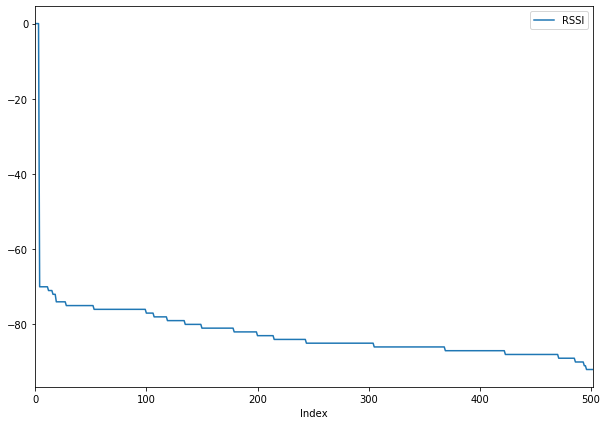

Mean RSSI: -82.21868787276343

LOCATION 11
Dropped 0 connections


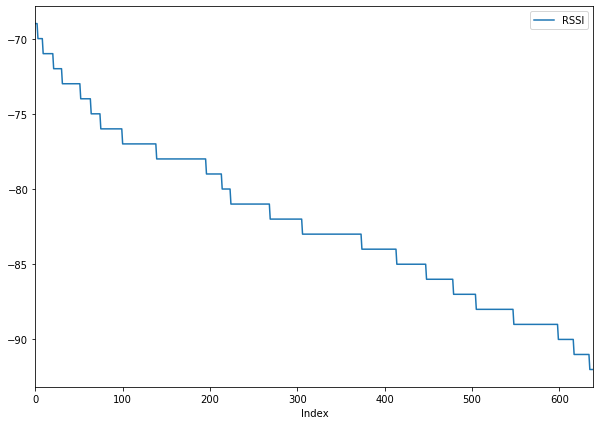

Mean RSSI: -82.121875

LOCATION 12
Dropped 0 connections


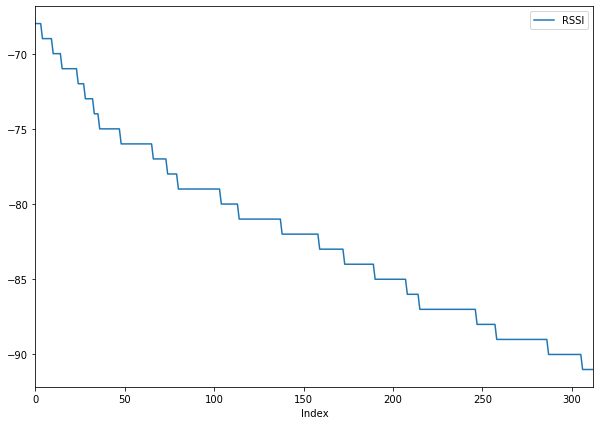

Mean RSSI: -82.0

LOCATION 13
Dropped 0 connections


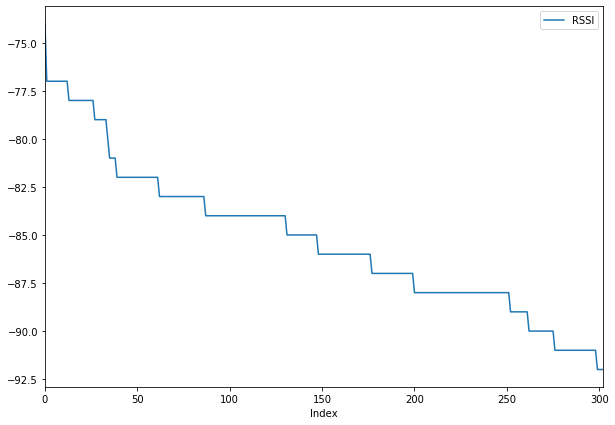

Mean RSSI: -85.25082508250826



In [39]:
for ii in range(1,14):
    print('LOCATION '+str(ii))
    df_1 = read_csv_data(index_csv_1,str(ii))
    plot_df_line(df_1)